In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sovikc/patient_survival_prediction_dataset/main/heart_failure_clinical_records_dataset.csv")

## 1. This is an attempt to reproduce the results presented in Table-4 of the Research Article https://doi.org/10.1186/s12911-020-1023-5 using Python. 

## Following criteria have been followed while reproducing the results:
i)   The same set of features have been used, as done by the authors.<br>
ii)  The same classifier with exact parameter values have been used.<br>
iii) The same training/test splitting approach has been used, as done by the authors.<br>
iv)  The same pre/post processing has been used.<br>
v)   The same performance metrics as shown in Table-4. is used<br><br>

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Fields in the dataset

In [4]:
total_num_features = df.shape[1]
print("Total Number of features including the Target variable = ", total_num_features)

Total Number of features including the Target variable =  13


### Records in the dataset

In [5]:
num_records = df.shape[0]
print("Number of Records = ", num_records)

Number of Records =  299


### Data types in the dataset

In [6]:
print(f"All the Data types found in the dataset")
print("---------------------------------------")
print(df.dtypes)
print("---------------------------------------")

All the Data types found in the dataset
---------------------------------------
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
---------------------------------------


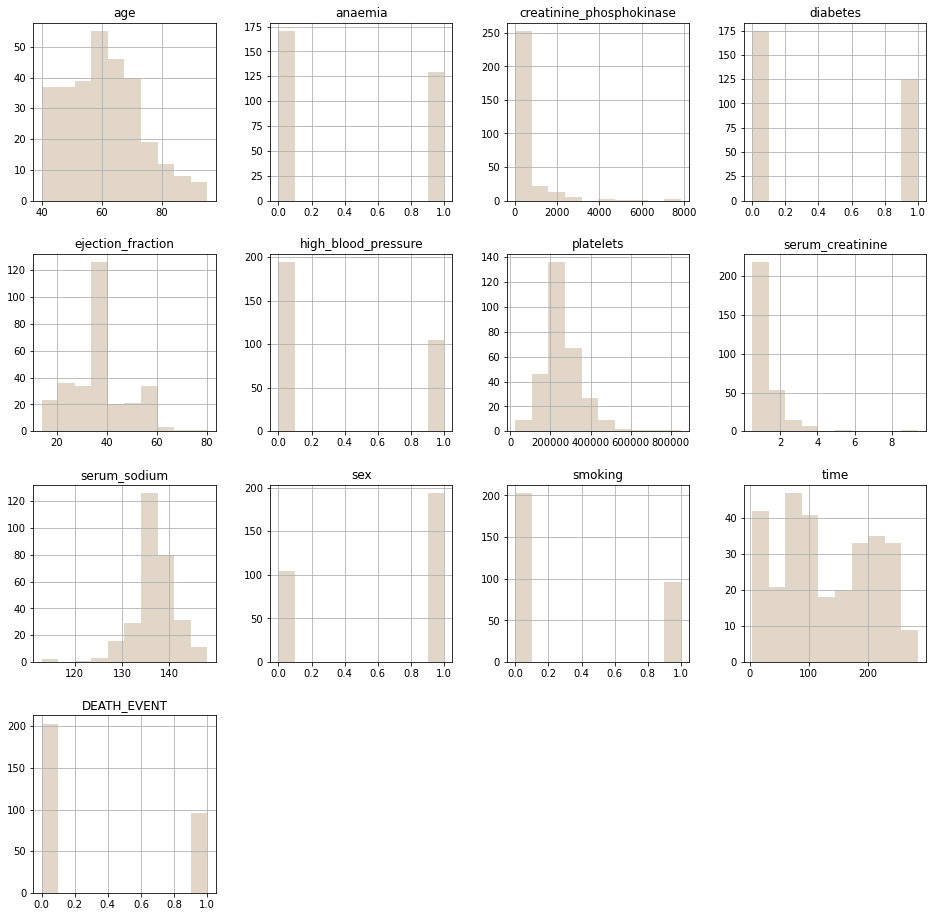

In [7]:
df.hist(figsize=(16,16), color="#e1d6c7")
plt.show()

### Discarding each Patient's (follow-up) time field to base suvival prediction on all clinical features 

In [8]:
df_without_time = df.drop(['time'], axis=1)
df_without_time.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


### Number of executions for each ML method = 100

In [9]:
executions = 100

### Target variable = DEATH_EVENT

In [10]:
target_label = 'DEATH_EVENT'
target_index = df_without_time.columns.get_loc(target_label)
print(f"The {target_label} feature has index {target_index}")

The DEATH_EVENT feature has index 11



 Number of Survived patients = 67.89 %
---------------------------------------------

 Number of Dead patients     = 32.11 %
---------------------------------------------



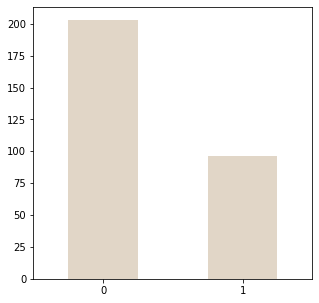

In [11]:
death_evt_cnt = df[target_label].value_counts()
print("\n Number of Survived patients =", 
      np.round((death_evt_cnt[0]/(death_evt_cnt[0] + death_evt_cnt[1])) * 100, decimals=2), "%")
print("---------------------------------------------")
print("\n Number of Dead patients     =", 
          np.round((death_evt_cnt[1]/(death_evt_cnt[0] + death_evt_cnt[1])) * 100, decimals=2),"%")
print("---------------------------------------------\n")
death_evt_cnt.plot(kind='bar', color="#e1d6c7", figsize=(5,5))
plt.xticks(rotation=0)
plt.show()

### Descriptive Statistics for the dataset

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<h3 style="line-height: 1.2">Methods without Hyper-parameter Optimization - Random Forest, One Rule, Linear Regression, Naive Bayes, and Decision Tree</h3>
<h4>Steps taken in the Report and the R code to achieve the above:</h4> 
<ol>
<li>Execute 100 iterations, and for each of the 100 executions, randomly sample the data instances from the complete original dataset without 'time' feature, to be used for the Training set and for the Test.</li>
<li>Split the dataset 80% (239) for the Training set, and 20% (the remaining 60) for the Test set from the randomly sampled data (as mentioned in Step 1).</li>
<li>Train the model on the Training set and test using the Test set.</li> 
<li>Given the randomized sampling of data instances for the dataset splits, each execution would lead to slightly different metrics. The metrics for each execution is collected.</li>
<li>After completion of all the executions a Mean value for each of the collected metric is calculated for reporting</li>
</ol>
<h4>The above steps have been replicated in this Notebook</h4>

<h3>Training Set = 80% and Testing Set = 20% for Non Hyper-parameter optimized models</h3>

In [14]:
training_set_percent = 80
training_set_first_index = 0
training_set_last_index = round(num_records*training_set_percent/100)

test_set_first_index = training_set_last_index + 1
test_set_last_index = num_records

print(f"Training Set first index = {training_set_first_index}, last index = {training_set_last_index}")
print(f"Testing Set first index = {test_set_first_index}, last index = {test_set_last_index}")

Training Set first index = 0, last index = 239
Testing Set first index = 240, last index = 299


### Metric functions for Matthews Correlation Coefficient, TP Rate, and TN Rate 

In [15]:
def matthews_correlation_coefficient(tn, fp, fn, tp):
    sum_1 = tp + fp
    sum_2 = tp + fn
    sum_3 = tn + fp
    sum_4 = tn + fn
    denom = (sum_1 * sum_2 * sum_3 * sum_4)
    if sum_1 == 0 or sum_2 == 0 or sum_3 == 0 or sum_4 == 0:
        denom = 1

    mcc = ((tp * tn)- (fp * fn)) / np.sqrt(denom)
    return mcc

In [16]:
def true_positive_rate(tp, fn):
    tpr = tp / (tp + fn)
    return tpr

In [17]:
def true_negative_rate(tn, fp):
    tnr = tn / (tn + fp)
    return tnr

<h3 style="line-height: 1.2">Common function to emulate the Steps 1 to 4, i.e., split data 80/20, execute 100 times with randomized sample of Patient data, train the model on each iteration, and record the different result to obtain an average</h3>

In [18]:
def methods_without_hyperparam_opt(model):
    metrics_data = []
    counter = 100 * 2
    for i in range(executions):
        randomized_patient_data = df_without_time.sample(num_records, random_state=counter)
        counter = counter - 1
        X_train = randomized_patient_data.iloc[training_set_first_index:training_set_last_index, 0:target_index]
        y_train = randomized_patient_data.iloc[training_set_first_index:training_set_last_index, target_index:]
        X_test = randomized_patient_data.iloc[test_set_first_index-1:test_set_last_index, 0:target_index]
        y_test = randomized_patient_data.iloc[test_set_first_index-1:test_set_last_index, target_index:]


        model.fit(X_train, y_train.values.ravel())

        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba_1d = y_pred_proba[:, 1]
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

        metrics_data.append({'MCC': matthews_correlation_coefficient(tn, fp, fn, tp), 
                             'F1 Score': metrics.f1_score(y_test, y_pred), 
                             'Accuracy': metrics.accuracy_score(y_test, y_pred), 
                             'TP Rate': true_positive_rate(tp, fn), 
                             'TN Rate': true_negative_rate(tn, fp), 
                             'PR AUC': metrics.average_precision_score(y_test, y_pred_proba_1d), 
                             'ROC AUC': metrics.roc_auc_score(y_test, y_pred_proba_1d)})
    
                              
    metrics_df = pd.DataFrame(metrics_data)
    return metrics_df

<h3>Function to store Survival prediction results on all clinical features – mean of 100 executions</h3>

In [19]:
survival_prediction_results = []
def append_survival_prediction_results(method_name, df):
    survival_prediction_results.append({'Method': method_name,
        'MCC': df['MCC'].mean(), 
        'F1 Score': df['F1 Score'].mean(), 
        'Accuracy': df['Accuracy'].mean(), 
        'TP Rate': df['TP Rate'].mean(), 
        'TN Rate': df['TN Rate'].mean(), 
        'PR AUC': df['PR AUC'].mean(), 
        'ROC AUC': df['ROC AUC'].mean()})

In [20]:
def get_prediction_metrics_df():
    prediction_metrics_df = pd.DataFrame(data=survival_prediction_results)
    return prediction_metrics_df

### Random Forest (Matching all the hyperparameters that are default in R implementation to achieve consistency of implementation with the Research Article)
(Used information from R-library manual in https://cran.r-project.org/web/packages/randomForest/randomForest.pdf (Page 17) 

In [21]:
rf = RandomForestClassifier(n_estimators=500, oob_score=True, bootstrap=True, random_state=20)
rf_metrics_df = methods_without_hyperparam_opt(rf)

In [22]:
append_survival_prediction_results("Random forests", rf_metrics_df)
get_prediction_metrics_df().head(10)

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Random forests,0.387506,0.54551,0.744833,0.496106,0.863877,0.637678,0.788106


### Decision Tree  (Matching all the hyperparameters that are default in R implementation to achieve consistency of implementation with the Research Article)

(Used information from R-library documentation https://www.rdocumentation.org/packages/rpart/versions/4.1-15/topics/rpart.control)

In [23]:
dtree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_samples_leaf=7, random_state=20)
dt_metrics_df = methods_without_hyperparam_opt(dtree)

In [24]:
append_survival_prediction_results("Decision tree", dt_metrics_df)
get_prediction_metrics_df().head(10)

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Random forests,0.387506,0.545510,0.744833,0.496106,0.863877,0.637678,0.788106
1,Decision tree,0.361146,0.539755,0.730833,0.510699,0.834327,0.559178,0.739177


### Gradient boosting: XGBoost (Matching all the hyperparameters that are default in Source code to achieve consistency of implementation with the Research Article)

(Github Repository link for the XGBoost code associated with the Research Article https://github.com/davidechicco/cardiovascular_heart_disease/blob/master/bin/xgboost_classification.r)

#### Installing library for XGBoost

In [25]:
!pip install xgboost

In [26]:
import xgboost as xgb

In [31]:
gbm = xgb.XGBClassifier(random_state=20, max_depth=2, learning_rate=1)
gbm_metrics_df = methods_without_hyperparam_opt(gbm)

[14:06:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:06:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:06:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [32]:
append_survival_prediction_results("Gradient boosting", gbm_metrics_df)
get_prediction_metrics_df().head(10)

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Random forests,0.387506,0.545510,0.744833,0.496106,0.863877,0.637678,0.788106
1,Decision tree,0.361146,0.539755,0.730833,0.510699,0.834327,0.559178,0.739177
2,Gradient boosting,0.280042,0.493291,0.691500,0.483670,0.790102,0.544580,0.690555


### Linear Regression (Matching threshold = 0.5 based on the Source code to achieve consistency of implementation with the Research Article)
Github Repository link for the  Linear Regression code associated with the Research Article https://github.com/davidechicco/cardiovascular_heart_disease/blob/master/bin/lin_reg_classification.r)

In [33]:
def linear_regression_without_hyperparam_opt():
    metrics_data = []
    counter = 100 * 2
    threshold = 0.5
    for i in range(executions):
        randomized_patient_data = df_without_time.sample(num_records, random_state=counter)
        counter = counter - 1
        X_train = randomized_patient_data.iloc[training_set_first_index:training_set_last_index, 0:target_index]
        y_train = randomized_patient_data.iloc[training_set_first_index:training_set_last_index, target_index:]
        X_test = randomized_patient_data.iloc[test_set_first_index-1:test_set_last_index, 0:target_index]
        y_test = randomized_patient_data.iloc[test_set_first_index-1:test_set_last_index, target_index:]

        lr = LinearRegression()
        lr.fit(X_train, y_train.values.ravel())

        y_pred = lr.predict(X_test)
        scores = len(y_pred)
        for index in range(scores):
            score = y_pred[index]
            if score > threshold:
                y_pred[index] = 1
            else:
                y_pred[index] = 0
            
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

        metrics_data.append({'MCC': matthews_correlation_coefficient(tn, fp, fn, tp), 
                             'F1 Score': metrics.f1_score(y_test, y_pred), 
                             'Accuracy': metrics.accuracy_score(y_test, y_pred), 
                             'TP Rate': true_positive_rate(tp, fn), 
                             'TN Rate': true_negative_rate(tn, fp), 
                             'PR AUC': metrics.average_precision_score(y_test, y_pred), 
                             'ROC AUC': metrics.roc_auc_score(y_test, y_pred)})
        
    
    metrics_df = pd.DataFrame(metrics_data)
    return metrics_df

In [34]:
lr_metrics_df = linear_regression_without_hyperparam_opt()

In [35]:
append_survival_prediction_results("Linear Regression", lr_metrics_df)
get_prediction_metrics_df().head(10)

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Random forests,0.387506,0.545510,0.744833,0.496106,0.863877,0.637678,0.788106
1,Decision tree,0.361146,0.539755,0.730833,0.510699,0.834327,0.559178,0.739177
2,Gradient boosting,0.280042,0.493291,0.691500,0.483670,0.790102,0.544580,0.690555
3,Linear Regression,0.345312,0.485780,0.736167,0.404268,0.893314,0.456069,0.648791


### Naive Bayes

In [36]:
nb = GaussianNB()
nb_metrics_df = methods_without_hyperparam_opt(nb)

In [37]:
append_survival_prediction_results("Naive Bayes", nb_metrics_df)
get_prediction_metrics_df().head(10)

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Random forests,0.387506,0.545510,0.744833,0.496106,0.863877,0.637678,0.788106
1,Decision tree,0.361146,0.539755,0.730833,0.510699,0.834327,0.559178,0.739177
2,Gradient boosting,0.280042,0.493291,0.691500,0.483670,0.790102,0.544580,0.690555
3,Linear Regression,0.345312,0.485780,0.736167,0.404268,0.893314,0.456069,0.648791
4,Naive Bayes,0.218948,0.312459,0.704833,0.217655,0.932681,0.574555,0.729178


### One rule

#### Discretization of Continuous variables

In [38]:
from sklearn.preprocessing import KBinsDiscretizer

def get_discretized_data():
    df_without_time_continuous = df_without_time[["age", "creatinine_phosphokinase", 
                                                  "ejection_fraction", "platelets", 
                                                  "serum_creatinine", "serum_sodium"]]
    k_bins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    df_without_time_continuous_values = k_bins.fit_transform(df_without_time_continuous)
    
    df_without_time_categorical = df_without_time[["anaemia", "diabetes", 
                                                   "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]]
    df_without_time_categorical_values = df_without_time_categorical.values

    discretized_data = np.concatenate((df_without_time_continuous_values, df_without_time_categorical_values), 
                                      axis=1)
    discretized_int_data = discretized_data.astype('int32')
    
    return discretized_int_data

#### Intsalling library for One Rule Classifier

In [39]:
!pip install mlxtend

In [40]:
from mlxtend.classifier import OneRClassifier

In [41]:
def onerule_without_hyperparam_opt(discretized_data):
    metrics_data = []
    counter = 100 * 2
    df_one_rule = pd.DataFrame(data=discretized_data)
    
    for i in range(executions):
        randomized_patient_data = df_one_rule.sample(num_records, random_state=counter)
        counter -= 1
        randomized_patient_np_arr = randomized_patient_data.to_numpy() 
    
        X = randomized_patient_np_arr[0:num_records, 0:target_index]
        y = randomized_patient_np_arr[0:num_records, target_index:]
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=counter)
        
        one_rule = OneRClassifier()
        one_rule.fit(X_train, y_train.flatten())
        y_pred = one_rule.predict(X_test)

        tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

        metrics_data.append({'MCC': matthews_correlation_coefficient(tn, fp, fn, tp), 
                             'F1 Score': metrics.f1_score(y_test, y_pred), 
                             'Accuracy': metrics.accuracy_score(y_test, y_pred), 
                             'TP Rate': true_positive_rate(tp, fn), 
                             'TN Rate': true_negative_rate(tn, fp), 
                             'PR AUC': metrics.average_precision_score(y_test, y_pred), 
                             'ROC AUC': metrics.roc_auc_score(y_test, y_pred)})
        
    metrics_df = pd.DataFrame(metrics_data)
    return metrics_df

In [42]:
discretized_int_data = get_discretized_data()
or_metrics_df = onerule_without_hyperparam_opt(discretized_int_data)

In [43]:
append_survival_prediction_results("One rule", or_metrics_df)
get_prediction_metrics_df().head(10)

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Random forests,0.387506,0.545510,0.744833,0.496106,0.863877,0.637678,0.788106
1,Decision tree,0.361146,0.539755,0.730833,0.510699,0.834327,0.559178,0.739177
2,Gradient boosting,0.280042,0.493291,0.691500,0.483670,0.790102,0.544580,0.690555
3,Linear Regression,0.345312,0.485780,0.736167,0.404268,0.893314,0.456069,0.648791
4,Naive Bayes,0.218948,0.312459,0.704833,0.217655,0.932681,0.574555,0.729178
5,One rule,0.327812,0.469739,0.731467,0.376250,0.898627,0.445088,0.637439


### Artificial neural network
1. The Source code for Artificial neural network is missing in the Github Repository. However, a previous version of a Lua script with Torch implementation seems to be using a 'Normalized' version of the dataset 'dataset_edited_without_time_NORM.csv'. Hence, 'StandardScaler' from scikit-learn library has been used. 
2. The 'hidden_layer_sizes=100' hyper-parameter is based on the caption in Table 4 of the Research Article.

Github Repository link for the previous version of Artificial neural network code associated with the Research Article
https://github.com/davidechicco/cardiovascular_heart_disease/blob/master/bin_previous/ann_script_val.lua


In [44]:
def nn_without_hyperparam_opt(model):
    metrics_data = []
    counter = 100 * 2
    for i in range(executions):
        randomized_patient_data = df_without_time.sample(num_records, random_state=counter)
        counter = counter - 1
        X_train = randomized_patient_data.iloc[training_set_first_index:training_set_last_index, 0:target_index]
        y_train = randomized_patient_data.iloc[training_set_first_index:training_set_last_index, target_index:]
        X_test = randomized_patient_data.iloc[test_set_first_index-1:test_set_last_index, 0:target_index]
        y_test = randomized_patient_data.iloc[test_set_first_index-1:test_set_last_index, target_index:]
        
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        X_test = scaler.transform(X_test)


        model.fit(X_train, y_train.values.ravel())

        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba_1d = y_pred_proba[:, 1]
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

        metrics_data.append({'MCC': matthews_correlation_coefficient(tn, fp, fn, tp), 
                             'F1 Score': metrics.f1_score(y_test, y_pred), 
                             'Accuracy': metrics.accuracy_score(y_test, y_pred), 
                             'TP Rate': true_positive_rate(tp, fn), 
                             'TN Rate': true_negative_rate(tn, fp), 
                             'PR AUC': metrics.average_precision_score(y_test, y_pred_proba_1d), 
                             'ROC AUC': metrics.roc_auc_score(y_test, y_pred_proba_1d)})
    
                              
    metrics_df = pd.DataFrame(metrics_data)
    return metrics_df

In [45]:
mlp = MLPClassifier(max_iter=2000, hidden_layer_sizes=100, random_state=10)
mlp_metrics_df = nn_without_hyperparam_opt(mlp)

In [46]:
append_survival_prediction_results("Artificial neural network", mlp_metrics_df)
get_prediction_metrics_df().head(10)

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Random forests,0.387506,0.545510,0.744833,0.496106,0.863877,0.637678,0.788106
1,Decision tree,0.361146,0.539755,0.730833,0.510699,0.834327,0.559178,0.739177
2,Gradient boosting,0.280042,0.493291,0.691500,0.483670,0.790102,0.544580,0.690555
3,Linear Regression,0.345312,0.485780,0.736167,0.404268,0.893314,0.456069,0.648791
4,Naive Bayes,0.218948,0.312459,0.704833,0.217655,0.932681,0.574555,0.729178
5,One rule,0.327812,0.469739,0.731467,0.376250,0.898627,0.445088,0.637439
6,Artificial neural network,0.318454,0.524045,0.705667,0.521753,0.793077,0.530888,0.693950


<h3 style="line-height: 1.2">Methods with Hyper-parameter Optimization - SVM Radial, SVM Linear, and k-Nearest Neighbors</h3>
<h6>Steps taken in the Report and the R code to achieve the above:</h6> 
<ol>
<li>Execute 100 iterations, and for each of the 100 executions, randomly sample the data instances from the complete original dataset without 'time' feature, to be used for the Training set and for the Test.</li>
<li>Split the dataset 80% (239) for the Training set, and 20% (the remaining 60) for the Test set from the randomly sampled data (as mentioned in Step 1).</li>
<li>Further split the dataset 80% (239 randomly selected) from the training set, into 60% (179 randomly sampled) and 20% (the remaining 60) for the training and validation sets respectively.</li>
    <li>On every execution a list of hyper-parameters are evaluated based on their <b>MCC metric</b> and the best one is selected to be used for the execution of that particular (i-th) iteration out of 100 iterations.</li>
<li>Train the model on the Training set using the best set of hyper-parameters and test using the Test set.</li>
<li>Given the randomized sampling of data instances for the dataset splits, each execution would lead to slightly different metrics. The metrics for each execution is collected.</li>
<li>After completion of all the executions a Mean value for each of the collected metric is calculated for reporting</li>
</ol>
<h4>The above steps have been replicated in this Notebook</h4>

<h3 style="line-height: 1.2">Create Start and End indexes for the Training Set to be split into subsets for 'training' (60%) and 'validation' (20%) sets for the purpose of Hyper-parameter tuning of SVM Radial, SVM Linear, and k-Nearest Neighbors</h3>

In [47]:
training_set_percentage = 60
validation_set_percentage = 20
test_set_percentage = 20

train_subset_start_idx = 0
train_subset_end_idx = int(np.round(num_records*(training_set_percentage/100)))
print("Training Subset Ending Index =", train_subset_end_idx)

val_subset_start_idx = train_subset_end_idx
val_subset_end_idx = int(np.round(num_records*(training_set_percentage + validation_set_percentage)/100))
print("Validation Subset Starting Index =", val_subset_start_idx)
print("Validation Subset Ending Index =", val_subset_end_idx)

Training Subset Ending Index = 179
Validation Subset Starting Index = 179
Validation Subset Ending Index = 239


### SVM

1. The SVM implementation of R library performs 'Normalization' by default. This information is based on https://cran.r-project.org/web/packages/e1071/vignettes/svmdoc.pdf (Page 6)
2. The hyper-parameter values for 'C' (0.001, 0.01, 0.1, 1, 10) are based on the Source code in the Github Repository referenced in the Research Article.
https://github.com/davidechicco/cardiovascular_heart_disease/blob/master/bin/svm_linear_classification.r
https://github.com/davidechicco/cardiovascular_heart_disease/blob/master/bin/svm_radial_classification.r

In [48]:
def svm_with_hyperparam_opt(kernel_fn):
    metrics_data = []
    counter = 100 * 2
    
    for i in range(executions):
        randomized_patient_data = df_without_time.sample(num_records, random_state=counter)
        counter -= 1
      
        X_train = randomized_patient_data.iloc[training_set_first_index:training_set_last_index, 0:target_index]
        y_train = randomized_patient_data.iloc[training_set_first_index:training_set_last_index, target_index:]
        X_test = randomized_patient_data.iloc[test_set_first_index-1:test_set_last_index, 0:target_index]
        y_test = randomized_patient_data.iloc[test_set_first_index-1:test_set_last_index, target_index:]
        
        C_values = [0.001, 0.01, 0.1, 1, 10]
        mcc_C_map = {}
        best_C_value = 0
        
        for C_value in C_values:
            X_trn_subset = randomized_patient_data.iloc[train_subset_start_idx:train_subset_end_idx, 
                                                        0:target_index]
            y_trn_subset = randomized_patient_data.iloc[train_subset_start_idx:train_subset_end_idx, 
                                                        target_index:]
            X_val = randomized_patient_data.iloc[val_subset_start_idx:val_subset_end_idx, 0:target_index]
            y_val = randomized_patient_data.iloc[val_subset_start_idx:val_subset_end_idx, target_index:]
            
            scaler = StandardScaler()
            scaler.fit(X_trn_subset)
            X_trn_subset = scaler.transform(X_trn_subset)

            X_val = scaler.transform(X_val)
            
            svm_hparam_tst = svm.SVC(kernel=kernel_fn, C=C_value)
            svm_hparam_tst.fit(X_trn_subset, y_trn_subset.values.ravel())
            y_val_pred = svm_hparam_tst.predict(X_val)
            tn_h, fp_h, fn_h, tp_h = metrics.confusion_matrix(y_val, y_val_pred, labels=[0,1]).ravel()
            mcc = matthews_correlation_coefficient(tn_h, fp_h, fn_h, tp_h)
            mcc_C_map[mcc]=C_value
            
        for mcc_val in sorted (mcc_C_map.keys(), reverse=True):
            best_C_value = mcc_C_map[mcc_val]
            break
            
        
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        X_test = scaler.transform(X_test)
        
        svm_rbf = svm.SVC(kernel=kernel_fn, C=best_C_value)
        svm_rbf.fit(X_train, y_train.values.ravel())
            
        y_pred = svm_rbf.predict(X_test)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

        metrics_data.append({'MCC': matthews_correlation_coefficient(tn, fp, fn, tp), 
                             'F1 Score': metrics.f1_score(y_test, y_pred), 
                             'Accuracy': metrics.accuracy_score(y_test, y_pred), 
                             'TP Rate': true_positive_rate(tp, fn), 
                             'TN Rate': true_negative_rate(tn, fp), 
                             'PR AUC': metrics.average_precision_score(y_test, y_pred), 
                             'ROC AUC': metrics.roc_auc_score(y_test, y_pred)})

    metrics_df = pd.DataFrame(metrics_data)
    return metrics_df

### SVM Radial

In [49]:
svmr_metrics_df = svm_with_hyperparam_opt("rbf")

In [50]:
append_survival_prediction_results("SVM radial", svmr_metrics_df)
get_prediction_metrics_df().head(10)

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Random forests,0.387506,0.545510,0.744833,0.496106,0.863877,0.637678,0.788106
1,Decision tree,0.361146,0.539755,0.730833,0.510699,0.834327,0.559178,0.739177
2,Gradient boosting,0.280042,0.493291,0.691500,0.483670,0.790102,0.544580,0.690555
3,Linear Regression,0.345312,0.485780,0.736167,0.404268,0.893314,0.456069,0.648791
4,Naive Bayes,0.218948,0.312459,0.704833,0.217655,0.932681,0.574555,0.729178
5,One rule,0.327812,0.469739,0.731467,0.376250,0.898627,0.445088,0.637439
6,Artificial neural network,0.318454,0.524045,0.705667,0.521753,0.793077,0.530888,0.693950
7,SVM radial,0.324521,0.502552,0.719167,0.460085,0.841230,0.443658,0.650657


### SVM Linear

In [51]:
svml_metrics_df = svm_with_hyperparam_opt("linear")

In [52]:
append_survival_prediction_results("SVM linear", svml_metrics_df)
get_prediction_metrics_df().head(10)

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Random forests,0.387506,0.545510,0.744833,0.496106,0.863877,0.637678,0.788106
1,Decision tree,0.361146,0.539755,0.730833,0.510699,0.834327,0.559178,0.739177
2,Gradient boosting,0.280042,0.493291,0.691500,0.483670,0.790102,0.544580,0.690555
3,Linear Regression,0.345312,0.485780,0.736167,0.404268,0.893314,0.456069,0.648791
4,Naive Bayes,0.218948,0.312459,0.704833,0.217655,0.932681,0.574555,0.729178
5,One rule,0.327812,0.469739,0.731467,0.376250,0.898627,0.445088,0.637439
6,Artificial neural network,0.318454,0.524045,0.705667,0.521753,0.793077,0.530888,0.693950
7,SVM radial,0.324521,0.502552,0.719167,0.460085,0.841230,0.443658,0.650657
8,SVM linear,0.341615,0.480952,0.736000,0.410760,0.889765,0.454959,0.650263


### k-Nearest Neighbors
1. For k-NN algorithm, the R library implementation performs 'Normalization' by default. It has been replicated using StandardScaler. This is based on the information available at https://www.rdocumentation.org/packages/DMwR/versions/0.4.1/topics/kNN
2. The hyperparameter values for nearest neighbors from 1 to 100 is based on the Source code for kNN in the Github Repository referenced in the Research Article https://github.com/davidechicco/cardiovascular_heart_disease/blob/master/bin/knn_classification.r

In [53]:
def knn_with_hyperparam_opt():
    metrics_data = []
    counter = 100 * 2
    
    for i in range(executions):
        randomized_patient_data = df_without_time.sample(num_records, random_state=counter)
        counter -= 1
      
        X_train = randomized_patient_data.iloc[training_set_first_index:training_set_last_index, 0:target_index]
        y_train = randomized_patient_data.iloc[training_set_first_index:training_set_last_index, target_index:]
        X_test = randomized_patient_data.iloc[test_set_first_index-1:test_set_last_index, 0:target_index]
        y_test = randomized_patient_data.iloc[test_set_first_index-1:test_set_last_index, target_index:]
        
        max_neighbors = 100
        mcc_k_map = {}
        best_k_value = 0
        
        for k_value in range(1, max_neighbors):
            X_trn_subset = randomized_patient_data.iloc[train_subset_start_idx:train_subset_end_idx, 
                                                        0:target_index]
            y_trn_subset = randomized_patient_data.iloc[train_subset_start_idx:train_subset_end_idx, 
                                                        target_index:]
            X_val = randomized_patient_data.iloc[val_subset_start_idx:val_subset_end_idx, 0:target_index]
            y_val = randomized_patient_data.iloc[val_subset_start_idx:val_subset_end_idx, target_index:]
            
            scaler = StandardScaler()
            scaler.fit(X_trn_subset)
            X_trn_subset = scaler.transform(X_trn_subset)

            X_val = scaler.transform(X_val)
            
            knn_hparam_tst = KNeighborsClassifier(n_neighbors=k_value)
            knn_hparam_tst.fit(X_trn_subset, y_trn_subset.values.ravel())
            y_val_pred = knn_hparam_tst.predict(X_val)
            tn_h, fp_h, fn_h, tp_h = metrics.confusion_matrix(y_val, y_val_pred, labels=[0,1]).ravel()
            mcc = matthews_correlation_coefficient(tn_h, fp_h, fn_h, tp_h)
            mcc_k_map[mcc]=k_value
            
        for mcc_val in sorted (mcc_k_map.keys(), reverse=True):
            best_k_value = mcc_k_map[mcc_val]
            break
            
        
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        X_test = scaler.transform(X_test)
        
        knn = KNeighborsClassifier(n_neighbors=best_k_value)
        knn.fit(X_train, y_train.values.ravel())
            
        y_pred = knn.predict(X_test)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

        metrics_data.append({'MCC': matthews_correlation_coefficient(tn, fp, fn, tp), 
                             'F1 Score': metrics.f1_score(y_test, y_pred), 
                             'Accuracy': metrics.accuracy_score(y_test, y_pred), 
                             'TP Rate': true_positive_rate(tp, fn), 
                             'TN Rate': true_negative_rate(tn, fp), 
                             'PR AUC': metrics.average_precision_score(y_test, y_pred), 
                             'ROC AUC': metrics.roc_auc_score(y_test, y_pred)})

    metrics_df = pd.DataFrame(metrics_data)
    return metrics_df

In [54]:
knn_metrics_df = knn_with_hyperparam_opt()

In [55]:
append_survival_prediction_results("k-nearest neighbors", knn_metrics_df)
get_prediction_metrics_df().head(10)

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Random forests,0.387506,0.545510,0.744833,0.496106,0.863877,0.637678,0.788106
1,Decision tree,0.361146,0.539755,0.730833,0.510699,0.834327,0.559178,0.739177
2,Gradient boosting,0.280042,0.493291,0.691500,0.483670,0.790102,0.544580,0.690555
3,Linear Regression,0.345312,0.485780,0.736167,0.404268,0.893314,0.456069,0.648791
4,Naive Bayes,0.218948,0.312459,0.704833,0.217655,0.932681,0.574555,0.729178
5,One rule,0.327812,0.469739,0.731467,0.376250,0.898627,0.445088,0.637439
6,Artificial neural network,0.318454,0.524045,0.705667,0.521753,0.793077,0.530888,0.693950
7,SVM radial,0.324521,0.502552,0.719167,0.460085,0.841230,0.443658,0.650657
8,SVM linear,0.341615,0.480952,0.736000,0.410760,0.889765,0.454959,0.650263
9,k-nearest neighbors,0.133726,0.216544,0.684167,0.150226,0.933093,0.358522,0.541659


In [56]:
mtr_results = get_prediction_metrics_df()
mtr_results.sort_values(by='MCC', ascending=False).head(10)

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Random forests,0.387506,0.545510,0.744833,0.496106,0.863877,0.637678,0.788106
1,Decision tree,0.361146,0.539755,0.730833,0.510699,0.834327,0.559178,0.739177
3,Linear Regression,0.345312,0.485780,0.736167,0.404268,0.893314,0.456069,0.648791
8,SVM linear,0.341615,0.480952,0.736000,0.410760,0.889765,0.454959,0.650263
5,One rule,0.327812,0.469739,0.731467,0.376250,0.898627,0.445088,0.637439
7,SVM radial,0.324521,0.502552,0.719167,0.460085,0.841230,0.443658,0.650657
6,Artificial neural network,0.318454,0.524045,0.705667,0.521753,0.793077,0.530888,0.693950
2,Gradient boosting,0.280042,0.493291,0.691500,0.483670,0.790102,0.544580,0.690555
4,Naive Bayes,0.218948,0.312459,0.704833,0.217655,0.932681,0.574555,0.729178
9,k-nearest neighbors,0.133726,0.216544,0.684167,0.150226,0.933093,0.358522,0.541659


## 2. This is an attempt to design and develop my own Machine Learning solution to this problem. The proposed solution is different from all approaches mentioned in the provided article.

### Feature Selection

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
import sklearn.preprocessing as preproc

In [58]:
all_feats_target_index = df.columns.get_loc("DEATH_EVENT")

feats = ["age", 
         "anaemia", 
         "creatinine_phosphokinase", 
         "diabetes", 
         "ejection_fraction", 
         "high_blood_pressure", 
         "platelets", 
         "serum_creatinine", 
         "serum_sodium", 
         "sex", 
         "smoking", 
         "time"]

feats_df = df.iloc[:, 0:all_feats_target_index]
lbls_df = df.iloc[:, all_feats_target_index:]

def normalize_df(df):
    scaler = StandardScaler()  
    scaler.fit(df)  
    X_norm = scaler.transform(df)  
    return X_norm

pred_df = pd.DataFrame(data=normalize_df(feats_df), columns=feats)
pred_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


### Select features according to the k highest scores - SelectKBest

In [59]:
sel_k_best = SelectKBest(score_func=f_classif, k=5)
sel_k_best_fit = sel_k_best.fit(pred_df, lbls_df.values.flatten())
df_k_best = pd.DataFrame(data=[sel_k_best_fit.scores_], columns=[feats])
df_k_best_T = df_k_best.T
unsort_df_k_best_T = df_k_best_T.rename(columns={0:'SelectKBest'})
sort_df_k_best = unsort_df_k_best_T.sort_values(by=['SelectKBest'], ascending=False)
sort_df_k_best

,SelectKBest
time,114.181264
serum_creatinine,28.158492
ejection_fraction,23.094063
age,20.435946
serum_sodium,11.765331
high_blood_pressure,1.881937
anaemia,1.310096
creatinine_phosphokinase,1.173259
platelets,0.718880
smoking,0.047333


### Meta-transformer for selecting features based on importance weights - SelectFromModel

In [60]:
sel_from_mdl = SelectFromModel(estimator=LogisticRegression())
sel_mdl_fit = sel_from_mdl.fit(pred_df, lbls_df.values.flatten())
df_sel_fr_mdl = pd.DataFrame(data=[sel_from_mdl.get_support()], columns=[feats])
df_sel_fr_mdl_T = df_sel_fr_mdl.T
df_sel_fr_mdl_rnm = df_sel_fr_mdl_T.rename(columns={0:'SelectFromModel'})
df_sel_fr_mdl_rnm.loc[df_sel_fr_mdl_rnm.SelectFromModel == True, "SelectFromModel"] = 1
df_sel_fr_mdl_rnm.loc[df_sel_fr_mdl_rnm.SelectFromModel == False, "SelectFromModel"] = 0
sort_df_sel_fr_mdl = df_sel_fr_mdl_rnm.sort_values(by=['SelectFromModel'], ascending=False)
sort_df_sel_fr_mdl

,SelectFromModel
age,1
ejection_fraction,1
serum_creatinine,1
time,1
anaemia,0
creatinine_phosphokinase,0
diabetes,0
high_blood_pressure,0
platelets,0
serum_sodium,0


### Feature importance from coefficients - LassoCV

In [61]:
lasso_cv = LassoCV().fit(pred_df, lbls_df.values.flatten())
feat_importance = np.abs(lasso_cv.coef_)
lcv = pd.DataFrame(data=[feat_importance], columns=[feats])
lcv_T = lcv.T
lcv_T_rnm = lcv_T.rename(columns={0:'LassoCV'})
sort_df_lcv = lcv_T_rnm.sort_values(by=['LassoCV'], ascending=False)
sort_df_lcv

,LassoCV
time,0.206689
ejection_fraction,0.110539
serum_creatinine,0.084570
age,0.062255
serum_sodium,0.030773
creatinine_phosphokinase,0.027051
sex,0.023232
diabetes,0.004153
platelets,0.002400
smoking,0.000095


### Feature ranking with recursive feature elimination - RFE

In [62]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

lgr = LogisticRegression(solver='lbfgs')
rfe = RFE(lgr, 4)
rfe_fit = rfe.fit(pred_df, lbls_df.values.flatten())
rfe_df = pd.DataFrame(data=[rfe_fit.ranking_], columns=[feats])
rfe_df_T = rfe_df.T
rfe_df_T_rnm = rfe_df_T.rename(columns={0:'RFE'})
sort_rfe_df = rfe_df_T_rnm.sort_values(by=['RFE'], ascending=True)
sort_rfe_df

,RFE
age,1
ejection_fraction,1
serum_creatinine,1
time,1
serum_sodium,2
sex,3
creatinine_phosphokinase,4
platelets,5
diabetes,6
high_blood_pressure,7


### Selected Features

In [63]:
feat_sel_df_1 = pd.merge(sort_df_k_best, sort_df_sel_fr_mdl, left_index=True,right_index=True)
feat_sel_df_2 = pd.merge(feat_sel_df_1, sort_df_lcv, left_index=True,right_index=True)
feat_sel_df_3 = pd.merge(feat_sel_df_2, sort_rfe_df, left_index=True,right_index=True)
feat_sel_df_3.head(12)

,SelectKBest,SelectFromModel,LassoCV,RFE
time,114.181264,1,0.206689,1
serum_creatinine,28.158492,1,0.084570,1
ejection_fraction,23.094063,1,0.110539,1
age,20.435946,1,0.062255,1
serum_sodium,11.765331,0,0.030773,2
high_blood_pressure,1.881937,0,0.000000,7
anaemia,1.310096,0,0.000000,9
creatinine_phosphokinase,1.173259,0,0.027051,4
platelets,0.718880,0,0.002400,5
smoking,0.047333,0,0.000095,8


### Dataframe with the Selected Subset of Features 
#### age, ejection_fraction, serum_creatinine, time

In [64]:
selected_feat_df = df[["age", "ejection_fraction", "serum_creatinine", "time", "DEATH_EVENT"]]
selected_feat_df.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,75.0,20,1.9,4,1
1,55.0,38,1.1,6,1
2,65.0,20,1.3,7,1
3,50.0,20,1.9,7,1
4,65.0,20,2.7,8,1


In [65]:
target_label = 'DEATH_EVENT'
subset_target_index = selected_feat_df.columns.get_loc(target_label)
print(f"The {target_label} for Selected Subset of Features has index {subset_target_index}")

The DEATH_EVENT for Selected Subset of Features has index 4


### Final Model (nominated after experiment)
### Combining Heterogeneous Ensemble predictions using Matthews correlation coefficient weighting

<div style="line-height: 1.2; font-size: 130%; padding-top:2px; padding-bottom:2px; margin-top:10px;">A performance-based weighting strategy has been used based on <b><i>Matthews correlation coefficient</i></b> score. As part of this strategy, the higher-performing base estimator based on their Matthews correlation coefficient value in the ensemble is assigned a higher weight, so that it can contribute more to the final prediction.<br>

After a base classifier has been trained, their performance is evaluated on the validation set. Let $mcc_i$ be the validation accuracy of the $i$-th classifier, $H_i$. The weight of each base classifier is then computed as $w_i =  \frac{mcc_i}{\sum_{i=1}^n \, mcc_i}$.<br>

The normalization term used in the denominator is the sum of all the individual Matthews correlation coefficient scores. It ensures that a classifier’s weight is proportional to its Matthews correlation coefficient and all the weights sum to 1.</div>

![title](https://github.com/sovikc/patient_survival_prediction_dataset/raw/main/combining_by_performance_weighting.png)

In [66]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [67]:
!pip install xgboost

In [68]:
import xgboost as xgb

### Base Estimators

In [69]:
def get_estimators():
    dtr_clf = DecisionTreeClassifier(max_depth=4, random_state=50)
    bag_clf = BaggingClassifier(base_estimator=dtr_clf, bootstrap=True, n_estimators=60, 
                            max_samples=100, oob_score=True, random_state=50)
    xgb_clf = xgb.XGBClassifier(random_state=50, 
                            max_depth=2, 
                            learning_rate=1,
                            use_label_encoder=False, eval_metric='logloss')
    mlp_clf = MLPClassifier(max_iter=2000, hidden_layer_sizes=100, random_state=50)
    return [('bag', bag_clf), ('xgb', xgb_clf), ('mlp', mlp_clf)]

In [70]:
def fit_estimators(estimators, X, y):
    for model, estimator in estimators:
        estimator.fit(X, y)
    return estimators

In [71]:
def predict_estimators(X, estimators):
    n_estimators = len(estimators)
    n_samples = X.shape[0] 

    y = np.zeros((n_samples, n_estimators))
    for i, (model, estimator) in enumerate(estimators):
        y[:, i] = estimator.predict(X)              
    return y

### MCC weighting

In [72]:
def mcc_score(y_test, y_pred):
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
    mcc = matthews_correlation_coefficient(tn, fp, fn, tp)
    return mcc

In [73]:
def combine_using_mcc_weighting(X, estimators, X_val, y_val):
    n_estimators = len(estimators)
    y_val_individual = predict_estimators(X_val, estimators)
    
    wts = [mcc_score(y_val, y_val_individual[:, i]) for i in range(n_estimators)] 
    wts /= np.sum(wts)
    
    y_pred_individual = predict_estimators(X, estimators)
    y_final = np.dot(y_pred_individual, wts) 
    return np.round(y_final)

### Run Ensemble

In [74]:
def run_ensemble(df, target_index):
    metrics_data = []
    counter = 200

    for i in range(executions):
        randomized_selected_feat_data = df.sample(num_records, random_state=counter)
        counter = counter - 1

        rndm_feat_np = randomized_selected_feat_data.to_numpy() 

        X = rndm_feat_np[:, 0:target_index]
        y = rndm_feat_np[:, target_index:]
        
        scaler = preproc.StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)
        # Further split the training set to training subset and validation set
        X_trn_sub, X_val, y_trn_sub, y_val = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)
        
        estimators = get_estimators()
        fitted_estimators = fit_estimators(estimators, X_trn_sub, y_trn_sub.flatten())
        
        y_pred = combine_using_mcc_weighting(X_test, fitted_estimators, X_val, y_val)
        
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

        metrics_data.append({'MCC': matthews_correlation_coefficient(tn, fp, fn, tp), 
                             'F1 Score': metrics.f1_score(y_test, y_pred), 
                             'Accuracy': metrics.accuracy_score(y_test, y_pred), 
                             'TP Rate': true_positive_rate(tp, fn), 
                             'TN Rate': true_negative_rate(tn, fp), 
                             'PR AUC': metrics.average_precision_score(y_test, y_pred), 
                             'ROC AUC': metrics.roc_auc_score(y_test, y_pred)})

        
    metrics_df = pd.DataFrame(metrics_data)
    return metrics_df

In [75]:
ensemble_prediction_results = []
def append_ensemble_prediction_results(method_name, df):
    ensemble_prediction_results.append({'Method': method_name,
        'MCC': df['MCC'].mean(), 
        'F1 Score': df['F1 Score'].mean(), 
        'Accuracy': df['Accuracy'].mean(), 
        'TP Rate': df['TP Rate'].mean(), 
        'TN Rate': df['TN Rate'].mean(), 
        'PR AUC': df['PR AUC'].mean(), 
        'ROC AUC': df['ROC AUC'].mean()})

In [76]:
wt_metrics_df = run_ensemble(selected_feat_df, subset_target_index)

In [77]:
append_ensemble_prediction_results("Heterogeneous Ensemble - combining predictions with MCC Weighting", 
                                   wt_metrics_df)
ens_pred_metrics_df = pd.DataFrame(data=ensemble_prediction_results)

In [78]:
ens_pred_metrics_df.head()

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Heterogeneous Ensemble - combining predictions...,0.656828,0.760853,0.8505,0.753158,0.89561,0.664149,0.824384


### --------------------------------------------------------------------------------------------------------------------------------------------

### Previous Experiment
### Homogeneous Ensemble with Voting (Experimental model)

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

In [80]:
def run_voting_ensemble(df, target_index):
    metrics_data = []
    counter = 200

    for i in range(executions):
        randomized_selected_feat_data = df.sample(num_records, random_state=counter)
        counter = counter - 1

        X_train = randomized_selected_feat_data.iloc[training_set_first_index:training_set_last_index, 
                                                     0:target_index]
        y_train = randomized_selected_feat_data.iloc[training_set_first_index:training_set_last_index, 
                                                     target_index:]
        X_test = randomized_selected_feat_data.iloc[test_set_first_index-1:test_set_last_index, 0:target_index]
        y_test = randomized_selected_feat_data.iloc[test_set_first_index-1:test_set_last_index, target_index:]
        
        base_estimator = DecisionTreeClassifier(max_depth=4, random_state=50)
        bagging_classifier = BaggingClassifier(base_estimator=base_estimator, bootstrap=True, n_estimators=60, 
                                    max_samples=100, oob_score=True, random_state=50)


        xgb_clf = xgb.XGBClassifier(random_state=50, 
                                    max_depth=2, 
                                    learning_rate=1,
                                    use_label_encoder=False, eval_metric='logloss')

        extra_classifier_clf = ExtraTreesClassifier(n_estimators=60, 
                                                    max_leaf_nodes=16, n_jobs=-1, random_state=50)


        voting_clf = VotingClassifier(estimators=[('bg', bagging_classifier), ('xgb', xgb_clf), 
                                                  ('ext', extra_classifier_clf)], voting='soft')
    
        voting_clf.fit(X_train, y_train.values.ravel())
        
        y_pred = voting_clf.predict(X_test)
        y_pred_proba = voting_clf.predict_proba(X_test)
        y_probs = y_pred_proba[:, 1]

        tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

        metrics_data.append({'MCC': matthews_correlation_coefficient(tn, fp, fn, tp), 
                             'F1 Score': metrics.f1_score(y_test, y_pred), 
                             'Accuracy': metrics.accuracy_score(y_test, y_pred), 
                             'TP Rate': true_positive_rate(tp, fn), 
                             'TN Rate': true_negative_rate(tn, fp), 
                             'PR AUC': metrics.average_precision_score(y_test, y_probs), 
                             'ROC AUC': metrics.roc_auc_score(y_test, y_probs)})
        
    metrics_df = pd.DataFrame(metrics_data)
    return metrics_df 

In [81]:
vt_metrics_df = run_voting_ensemble(selected_feat_df, subset_target_index)

In [82]:
append_ensemble_prediction_results("Homogeneous Ensemble with Voting", vt_metrics_df)
ens_pred_metrics_df = pd.DataFrame(data=ensemble_prediction_results)
ens_pred_metrics_df.head()

,Method,MCC,F1 Score,Accuracy,TP Rate,TN Rate,PR AUC,ROC AUC
0,Heterogeneous Ensemble - combining predictions...,0.656828,0.760853,0.850500,0.753158,0.895610,0.664149,0.824384
1,Homogeneous Ensemble with Voting,0.640148,0.745582,0.844833,0.731088,0.899114,0.815792,0.909841
